In [1]:
import pandas as pd
master_table = pd.read_csv('/Users/suchirnaik/Downloads/KPMG/master_table_for_fuzzy.csv')

In [2]:
master_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39


In [3]:
grouped_df = master_table.groupby(['customer_id', 'brand']).count().reset_index()
grouped_df = grouped_df[['customer_id','brand','transaction_id']]
grouped_df = grouped_df.rename(columns={'transaction_id': 'quantity'})
master_table = pd.merge(master_table, grouped_df, on=['customer_id', 'brand'], how='inner')
duplicates = master_table.duplicated(subset=['customer_id', 'brand'], keep=False)

# Filter out duplicates
master_table = master_table[~duplicates]

In [4]:
master_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value,quantity
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70,1
5,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81,1
8,7,22,1542,2017-04-21,True,Approved,WeareA2B,Standard,medium,medium,...,39.0,2155.0,5.666667,5.230769,5.946524,5.955056,133,5,5625.49,1
9,8,15,2459,2017-07-15,False,Approved,WeareA2B,Standard,medium,medium,...,31.0,4034.0,6.178571,6.444444,5.479592,5.480000,53,11,11877.19,1
13,10,12,3262,2017-08-30,True,Approved,WeareA2B,Standard,medium,medium,...,0.0,4221.0,5.333333,7.200000,5.730803,5.955056,1,10,9899.64,1


In [5]:
brands = master_table['brand'].unique()


In [6]:
brands

array(['Trek Bicycles', 'Norco Bicycles', 'WeareA2B', 'Giant Bicycles',
       'OHM Cycles', 'Solex'], dtype=object)

In [7]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                      bool
order_status                    object
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
standard_cost                  float64
product_first_sold_date         object
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator              object
owns_car                        object
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                  

In [8]:
### Converting the respective features to Binary
#### 1. online_order
#### 2. deceased_indiactor
#### 3. Owns_car

In [9]:
#First dropping the un-necssary columsn
columns_to_drop = ['standard_cost', 'product_first_sold_date']
master_table.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
## Converting to boolean:

In [11]:
master_table['online_order'].unique()

array([ True, False])

In [12]:
master_table['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
master_table['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
#False -0 , True -1
#N- 0, Y-1
#No - 0, Yes -1 

In [15]:
master_table['deceased_indicator'].value_counts()

N    6699
Y       2
Name: deceased_indicator, dtype: int64

In [16]:
master_table['online_order'] = master_table['online_order'].replace({True: 1, False: 0})

In [17]:
master_table['online_order'].unique()

array([1, 0])

In [18]:
master_table['owns_car'] = master_table['owns_car'].replace({'Yes': 1, 'No': 0})

In [19]:
master_table['owns_car'].unique()

array([1, 0])

In [20]:
master_table['deceased_indicator'] = master_table['deceased_indicator'].replace({'Y': 1, 'N': 0})

In [21]:
master_table['deceased_indicator'].unique()

array([0, 1])

In [22]:
master_table

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value,quantity
2,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70,1
5,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,...,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81,1
8,7,22,1542,2017-04-21,1,Approved,WeareA2B,Standard,medium,medium,...,39.0,2155.0,5.666667,5.230769,5.946524,5.955056,133,5,5625.49,1
9,8,15,2459,2017-07-15,0,Approved,WeareA2B,Standard,medium,medium,...,31.0,4034.0,6.178571,6.444444,5.479592,5.480000,53,11,11877.19,1
13,10,12,3262,2017-08-30,1,Approved,WeareA2B,Standard,medium,medium,...,0.0,4221.0,5.333333,7.200000,5.730803,5.955056,1,10,9899.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19984,80,275,2017-07-02,0,Approved,Trek Bicycles,Standard,medium,large,...,0.0,2165.0,5.103448,6.375000,5.730803,5.624277,132,7,8902.17,1
17110,19985,31,873,2017-11-15,1,Approved,Giant Bicycles,Standard,medium,medium,...,0.0,2287.0,5.764706,6.100000,5.730803,5.659091,31,5,4426.20,1
17111,19987,38,2385,2017-11-01,0,Approved,Solex,Standard,medium,medium,...,0.0,3074.0,5.483871,7.666667,5.730803,5.608696,31,8,7901.94,1
17112,19993,13,5,2017-04-28,0,Approved,Solex,Standard,medium,medium,...,40.0,2448.0,5.130435,8.500000,5.849162,5.608696,16,6,5903.20,1


In [23]:
#Also dropping order status
master_table.drop('order_status', axis=1, inplace=True)

In [24]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                     int64
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator               int64
owns_car                         int64
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                          int64
frequency                        int64
total_monetary_value           float64
quantity                 

In [25]:
master_table['gender'].value_counts()

Female    3379
Male      3177
U          145
Name: gender, dtype: int64

In [26]:
master_table_one_hot = pd.get_dummies(master_table, columns=['brand', 'product_line', 'product_class', 'product_size','gender','job_title','wealth_segment'])

In [27]:
master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer II,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
2,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,0,1
5,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8,7,22,1542,2017-04-21,1,60.34,0,1,12.0,39.0,...,0,0,0,0,0,0,0,0,0,1
9,8,15,2459,2017-07-15,0,1292.84,0,0,18.0,31.0,...,0,0,0,0,0,0,0,0,1,0
13,10,12,3262,2017-08-30,1,1231.15,0,0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19984,80,275,2017-07-02,0,1469.44,0,0,13.0,0.0,...,0,0,0,0,0,0,0,0,1,0
17110,19985,31,873,2017-11-15,1,230.91,0,1,20.0,0.0,...,0,0,0,0,0,0,0,1,0,0
17111,19987,38,2385,2017-11-01,0,1577.53,0,0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,1
17112,19993,13,5,2017-04-28,0,1163.89,0,1,8.0,40.0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                     int64
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator               int64
owns_car                         int64
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                          int64
frequency                        int64
total_monetary_value           float64
quantity                 

In [29]:
master_table['product_id'].unique()

array([  3,  88,  22,  15,  12,  16,  33,  27,  37,  64,   1,  99,   0,
        92,  14,  76,  55,  86,  77,  96,   6,  91,   2,   4,  38,  87,
        31,  45,  78,  89,  70,  26,  24,  25,  50,  44,  60,  67,   9,
        10,  97,  62,  20,  17,  46,  56,  74,  23,  81,  58,   5,  63,
        40,  35,  13,  30,   7,  21,  61,  48,  65,  49,  18,  93,  36,
        68,  82,  39,  83,  73,  34,  79,  54,  80,  84, 100,  51,  52,
        90,  66,  71,  85,  57,  94,  95,  41,  42,  72,  69,   8,  29,
        19,  53,  32,  28,  59,  43,  47,  75,  98,  11])

In [30]:
### Finding the optimal number of clusters 

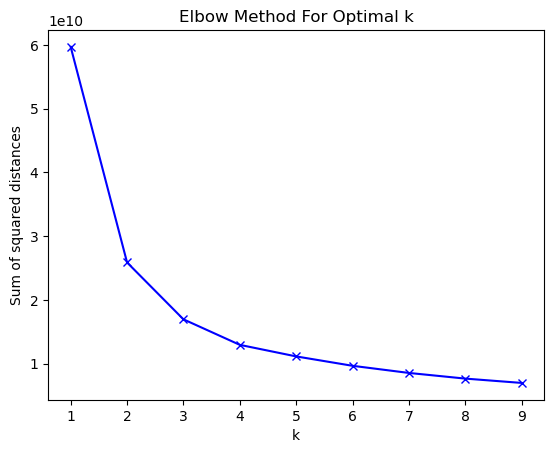

In [31]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.46965909887948537
For n_clusters = 3, the silhouette score is 0.3844381590824485
For n_clusters = 4, the silhouette score is 0.34649992186479994
For n_clusters = 5, the silhouette score is 0.29184075401746684


In [33]:
#Silouhetter score was less. Trying to increase score by dropping certain columns

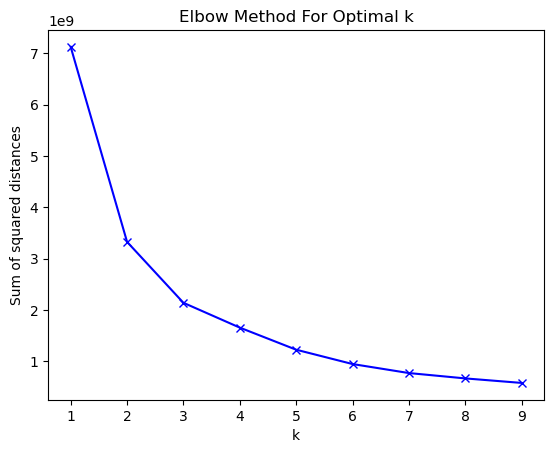

In [34]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


##### Increase in silouhetter scores can be seen by dropping irrelavant columns which may not be useful for clustering

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4990646315883532
For n_clusters = 3, the silhouette score is 0.43612149270782447
For n_clusters = 4, the silhouette score is 0.41981803434061904
For n_clusters = 5, the silhouette score is 0.4344256744775751


In [36]:
master_table['product_line'].unique()

array(['Standard', 'Road', 'Touring', 'Mountain'], dtype=object)

In [37]:
master_table['product_class'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [38]:
master_table['product_size'].unique()

array(['large', 'medium', 'small'], dtype=object)

In [39]:
master_table_one_hot.dtypes

transaction_id                       int64
product_id                           int64
customer_id                          int64
transaction_date                    object
online_order                         int64
                                     ...  
job_title_Web Developer III          uint8
job_title_Web Developer IV           uint8
wealth_segment_Affluent Customer     uint8
wealth_segment_High Net Worth        uint8
wealth_segment_Mass Customer         uint8
Length: 236, dtype: object

In [40]:
downloads_folder = f'/Users/suchirnaik/Downloads/KPMG/'


file_name = 'master_table_one_hot.csv'


file_path = downloads_folder + file_name

master_table_one_hot.to_csv(file_path, index=False) 

In [41]:
master_table

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value,quantity
2,2,3,3120,2017-05-21,1,Trek Bicycles,Standard,medium,large,2091.47,...,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70,1
5,4,88,3135,2017-08-31,0,Norco Bicycles,Standard,medium,medium,1198.46,...,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81,1
8,7,22,1542,2017-04-21,1,WeareA2B,Standard,medium,medium,60.34,...,39.0,2155.0,5.666667,5.230769,5.946524,5.955056,133,5,5625.49,1
9,8,15,2459,2017-07-15,0,WeareA2B,Standard,medium,medium,1292.84,...,31.0,4034.0,6.178571,6.444444,5.479592,5.480000,53,11,11877.19,1
13,10,12,3262,2017-08-30,1,WeareA2B,Standard,medium,medium,1231.15,...,0.0,4221.0,5.333333,7.200000,5.730803,5.955056,1,10,9899.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19984,80,275,2017-07-02,0,Trek Bicycles,Standard,medium,large,1469.44,...,0.0,2165.0,5.103448,6.375000,5.730803,5.624277,132,7,8902.17,1
17110,19985,31,873,2017-11-15,1,Giant Bicycles,Standard,medium,medium,230.91,...,0.0,2287.0,5.764706,6.100000,5.730803,5.659091,31,5,4426.20,1
17111,19987,38,2385,2017-11-01,0,Solex,Standard,medium,medium,1577.53,...,0.0,3074.0,5.483871,7.666667,5.730803,5.608696,31,8,7901.94,1
17112,19993,13,5,2017-04-28,0,Solex,Standard,medium,medium,1163.89,...,40.0,2448.0,5.130435,8.500000,5.849162,5.608696,16,6,5903.20,1


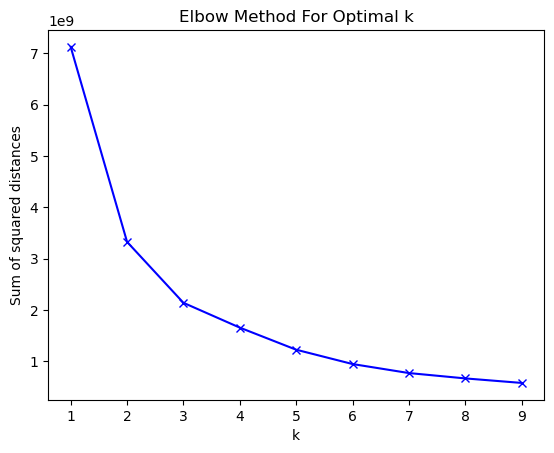

In [42]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [43]:
X

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,quantity,brand_Giant Bicycles,brand_Norco Bicycles,...,job_title_Web Designer II,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
2,3,1,2091.47,1,10.0,38.0,2196.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,88,0,1198.46,0,16.0,0.0,2096.0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8,22,1,60.34,1,12.0,39.0,2155.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,15,0,1292.84,0,18.0,31.0,4034.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
13,12,1,1231.15,0,12.0,0.0,4221.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,80,0,1469.44,0,13.0,0.0,2165.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17110,31,1,230.91,1,20.0,0.0,2287.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
17111,38,0,1577.53,0,8.0,0.0,3074.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
17112,13,0,1163.89,1,8.0,40.0,2448.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4990653669107991
For n_clusters = 3, the silhouette score is 0.4361227423063644
For n_clusters = 4, the silhouette score is 0.41981989513927026
For n_clusters = 5, the silhouette score is 0.4344277649249265


In [45]:
### Filtering columns 

In [46]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder


In [47]:
variances = master_table_one_hot.var()

/var/folders/0w/78_w9pm16ts4trsks5rjpd440000gn/T/ipykernel_25385/1104478273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = master_table_one_hot.var()


In [48]:
threshold = 0.1

# Apply variance thresholding
# Features with variance below the threshold will be removed
selector = VarianceThreshold(threshold=threshold)
df_selected = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

In [47]:
df_selected

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Road,product_line_Standard,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,2.0,0.0,71.49,1.0,10.0,0.0,3064.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3.0,1.0,2091.47,1.0,10.0,38.0,2196.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,37.0,0.0,1793.43,0.0,22.0,40.0,2835.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,88.0,0.0,1198.46,0.0,16.0,0.0,2096.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,25.0,1.0,1538.99,1.0,16.0,0.0,2153.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9.0,1.0,742.54,1.0,7.0,39.0,4217.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
17110,51.0,1.0,2005.66,1.0,7.0,23.0,3109.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17111,41.0,1.0,416.98,0.0,19.0,43.0,4405.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
17112,87.0,1.0,1636.90,0.0,14.0,43.0,3630.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


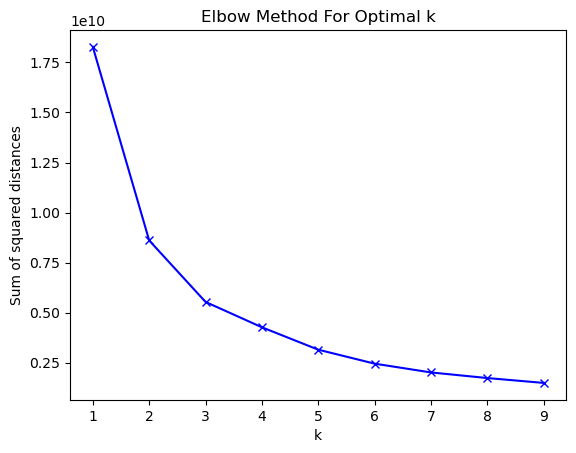

In [48]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
#X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649


In [50]:
threshold = 0.2

# Apply variance thresholding
# Features with variance below the threshold will be removed
selector = VarianceThreshold(threshold=threshold)
df_selected_2 = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

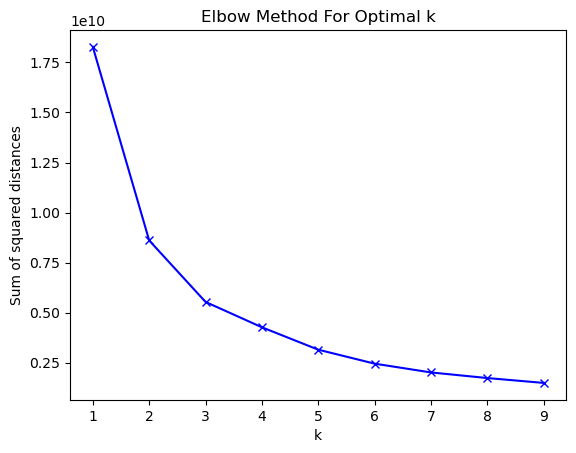

In [51]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
#X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected_2)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected_2)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49702157035110534
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.43425706456421237
For n_clusters = 6, the silhouette score is 0.43884729261825445
For n_clusters = 7, the silhouette score is 0.4425837836949274
For n_clusters = 8, the silhouette score is 0.45109259895391574


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649
For n_clusters = 6, the silhouette score is 0.43884729261825445
For n_clusters = 7, the silhouette score is 0.4425837836949274
For n_clusters = 8, the silhouette score is 0.45109259895391574
For n_clusters = 9, the silhouette score is 0.4393903429938785
For n_clusters = 10, the silhouette score is 0.4435806499443591
For n_clusters = 11, the silhouette score is 0.4246666738701766
For n_clusters = 12, the silhouette score is 0.4307232579051154
For n_clusters = 13, the silhouette score is 0.42341238076818777
For n_clusters = 14, the silhouette score is 0.4297658859997054


In [54]:
# We can see that by increasing the variance threshold the clusters get better but increasing the cluster number increases the value of the score . So more the clusters the better . So we will now experiment with the originjal columns if by increasing cluatsers the score increases.We want to get a score close to 0.5

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4970873905269969
For n_clusters = 3, the silhouette score is 0.4350373195691807
For n_clusters = 4, the silhouette score is 0.42086662385877344
For n_clusters = 5, the silhouette score is 0.43421705967992585
For n_clusters = 6, the silhouette score is 0.4388469572650544
For n_clusters = 7, the silhouette score is 0.4425880151473261
For n_clusters = 8, the silhouette score is 0.45110388972153637
For n_clusters = 9, the silhouette score is 0.43940082369839895
For n_clusters = 10, the silhouette score is 0.4435907397930656
For n_clusters = 11, the silhouette score is 0.42467583665524555
For n_clusters = 12, the silhouette score is 0.43074018066162567
For n_clusters = 13, the silhouette score is 0.42342041848740714
For n_clusters = 14, the silhouette score is 0.42977867056917546
For n_clusters = 15, the silhouette score is 0.4301035550322913
For n_clusters = 16, the silhouette score is 0.4211277296787565
For n_clusters = 17, the silhouette scor

In [56]:
#Aslo just checking once woth all the columns  of how the sillouhette score varies

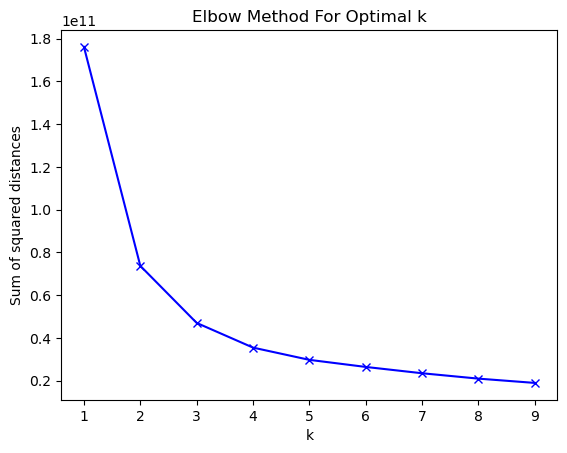

In [57]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X_2 = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_2)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_2)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.475523604365343
For n_clusters = 3, the silhouette score is 0.4033039302234717
For n_clusters = 4, the silhouette score is 0.35039865766877915
For n_clusters = 5, the silhouette score is 0.3128470107934936
For n_clusters = 6, the silhouette score is 0.3165957385898179
For n_clusters = 7, the silhouette score is 0.2958012381625307
For n_clusters = 8, the silhouette score is 0.30973879592890685
For n_clusters = 9, the silhouette score is 0.2989363130541131
For n_clusters = 10, the silhouette score is 0.3030242330846285
For n_clusters = 11, the silhouette score is 0.29980216396971726
For n_clusters = 12, the silhouette score is 0.29338204913727584
For n_clusters = 13, the silhouette score is 0.2864619100510886
For n_clusters = 14, the silhouette score is 0.2840292657864037
For n_clusters = 15, the silhouette score is 0.2801101960550057
For n_clusters = 16, the silhouette score is 0.2723230136716856
For n_clusters = 17, the silhouette score is 

In [59]:
# We can see fro the above that thre is a considerable increase in the score when we select columns 
## We shall choose 8 clusters for this project which should be idle.
## Why are we choosing more clusters?
# 1.Increased Personalization: More clusters mean finer segmentation, which allows for highly personalized recommendations. Customers within each cluster likely have very similar preferences, enabling more precise recommendations.
# 2. Customer Satisfaction: Customers often appreciate recommendations that resonate with their specific preferences. By having more clusters and providing more targeted recommendations, you can enhance customer satisfaction and engagement.
# 3. Different clusters may have different preferences for various products or services. More clusters can help you capture a wider range of preferences and suggest a more diverse set of products.

In [ ]:
##3 Visualising the plot using PCA

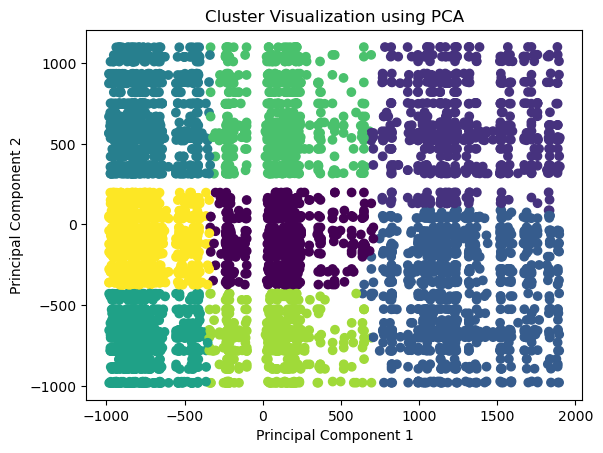

In [49]:
## It can be seen below thta all the clusters are pretty well seperated
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

# Assuming 'X' contains your data (features including one-hot encoded)
# Assuming 'labels' contains the cluster labels for each data point

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot in the reduced PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization using PCA')
plt.show()


In [50]:
X ###3 x shoukld have customer id also since we want to group customers who have bought similar producst

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,quantity,brand_Giant Bicycles,brand_Norco Bicycles,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
2,3,1,2091.47,1,10.0,38.0,2196.0,1,0,0,...,0,0,0,0,0,0,0,0,1,4
5,88,0,1198.46,0,16.0,0.0,2096.0,1,0,1,...,0,0,0,0,0,0,0,0,1,7
8,22,1,60.34,1,12.0,39.0,2155.0,1,0,0,...,0,0,0,0,0,0,0,0,1,3
9,15,0,1292.84,0,18.0,31.0,4034.0,1,0,0,...,0,0,0,0,0,0,0,1,0,2
13,12,1,1231.15,0,12.0,0.0,4221.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,80,0,1469.44,0,13.0,0.0,2165.0,1,0,0,...,0,0,0,0,0,0,0,1,0,7
17110,31,1,230.91,1,20.0,0.0,2287.0,1,1,0,...,0,0,0,0,0,0,1,0,0,3
17111,38,0,1577.53,0,8.0,0.0,3074.0,1,0,0,...,0,0,0,0,0,0,0,0,1,6
17112,13,0,1163.89,1,8.0,40.0,2448.0,1,0,0,...,0,0,0,0,0,0,1,0,0,7


In [51]:
X

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,quantity,brand_Giant Bicycles,brand_Norco Bicycles,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
2,3,1,2091.47,1,10.0,38.0,2196.0,1,0,0,...,0,0,0,0,0,0,0,0,1,4
5,88,0,1198.46,0,16.0,0.0,2096.0,1,0,1,...,0,0,0,0,0,0,0,0,1,7
8,22,1,60.34,1,12.0,39.0,2155.0,1,0,0,...,0,0,0,0,0,0,0,0,1,3
9,15,0,1292.84,0,18.0,31.0,4034.0,1,0,0,...,0,0,0,0,0,0,0,1,0,2
13,12,1,1231.15,0,12.0,0.0,4221.0,1,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,80,0,1469.44,0,13.0,0.0,2165.0,1,0,0,...,0,0,0,0,0,0,0,1,0,7
17110,31,1,230.91,1,20.0,0.0,2287.0,1,1,0,...,0,0,0,0,0,0,1,0,0,3
17111,38,0,1577.53,0,8.0,0.0,3074.0,1,0,0,...,0,0,0,0,0,0,0,0,1,6
17112,13,0,1163.89,1,8.0,40.0,2448.0,1,0,0,...,0,0,0,0,0,0,1,0,0,7


In [52]:
last_column_X = X.iloc[:, -1]

last_column_X

2        4
5        7
8        3
9        2
13       2
        ..
17109    7
17110    3
17111    6
17112    7
17113    6
Name: cluster, Length: 6701, dtype: int32

In [53]:
# Concatenate the last column of df1 to df2 as a new column
master_table_one_hot['cluster'] = last_column_X.values


In [54]:
### we would also need to have of multiple products are bring purchased

##### Final master table with the clusters

In [55]:

master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
2,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,4
5,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,7
8,7,22,1542,2017-04-21,1,60.34,0,1,12.0,39.0,...,0,0,0,0,0,0,0,0,1,3
9,8,15,2459,2017-07-15,0,1292.84,0,0,18.0,31.0,...,0,0,0,0,0,0,0,1,0,2
13,10,12,3262,2017-08-30,1,1231.15,0,0,12.0,0.0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19984,80,275,2017-07-02,0,1469.44,0,0,13.0,0.0,...,0,0,0,0,0,0,0,1,0,7
17110,19985,31,873,2017-11-15,1,230.91,0,1,20.0,0.0,...,0,0,0,0,0,0,1,0,0,3
17111,19987,38,2385,2017-11-01,0,1577.53,0,0,8.0,0.0,...,0,0,0,0,0,0,0,0,1,6
17112,19993,13,5,2017-04-28,0,1163.89,0,1,8.0,40.0,...,0,0,0,0,0,0,1,0,0,7


## Creation of the mebership functions based on the EDA that we did 

In [56]:
### 1. Memebership recency 

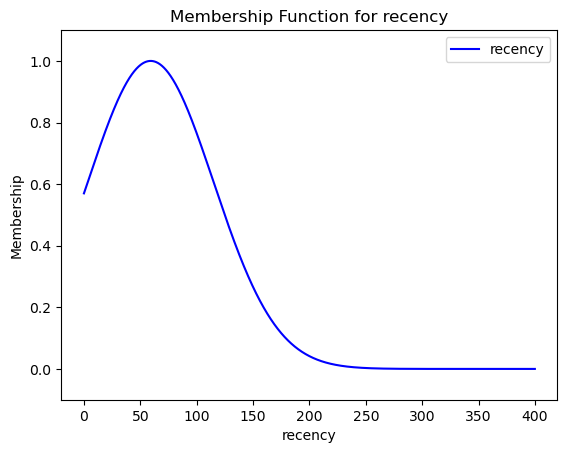

In [57]:
#While doing the eda we found that customers ususlally purchase with a recency of about 60 days . There fore we use a guassian bell curve for recommdations after 60 days
#The reasoning is that promortions are to be sent to the customer when they reach the 60 day average and maembership be adjusted based on that
# So the bell curve function also works in that way that it increases towards the mean and then decrease
# Writeabout the advantages of using this bell curve 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

def membership_income(x):
    mean = master_table_one_hot['recency'].mean()
    std = master_table_one_hot['recency'].std()
    mfx = fuzz.gaussmf(x, mean, std)
    return mfx

x = np.arange(0, 400, 0.1)
mfx = membership_income(x)

plt.plot(x, mfx, 'b', linewidth=1.5, label='recency')
plt.title('Membership Function for recency')
plt.xlabel('recency')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

In [58]:
### 2. Membership Frequency

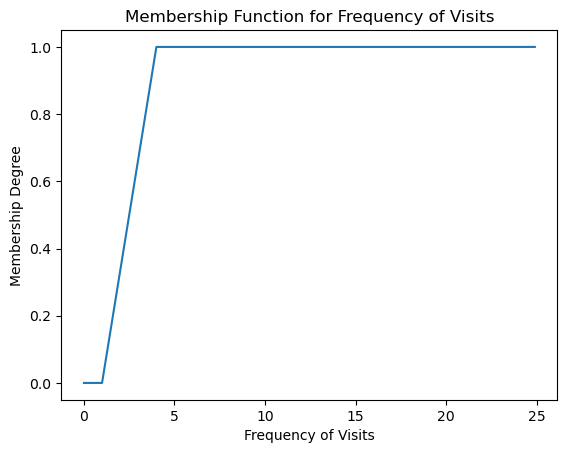

In [59]:
#Membership increases upto the 75th percentile and then becomes a constant one 
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

def membership_frequency_of_visits(x):
    a = master_table_one_hot['frequency'].min()
    b = master_table_one_hot['frequency'].quantile(0.25)
    c = master_table_one_hot['frequency'].quantile(0.75)
    d = master_table_one_hot['frequency'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

x = np.arange(0, 25, 0.1)
mfx = membership_frequency_of_visits(x)

plt.plot(x, mfx)
plt.title('Membership Function for Frequency of Visits')
plt.xlabel('Frequency of Visits')
plt.ylabel('Membership Degree')
plt.show()
#We want the frequency to increase and teh n become constant 
#since we would like to recommend products to high frquency customers

### 3. Monetray value

In [60]:
##### We will have to decide which fuzzy logic we would like to use based on the buisness logic
##### For now we will go ahead with the secoind memebership function since we would like to reommend more items to thos  who have purchased more
##### But again not all businesses would like to recommend items to only those who purchase more or have a high memebership score or have the best correlation between items based on traditional recommedations. This is when fuzzy logic can come into the picture to dteremine recommendations based on buisness insights or business values 

/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/membership/generatemf.py:149: RuntimeWarning: overflow encountered in power
  return 1. / (1. + np.abs((x - c) / a) ** (2 * b))


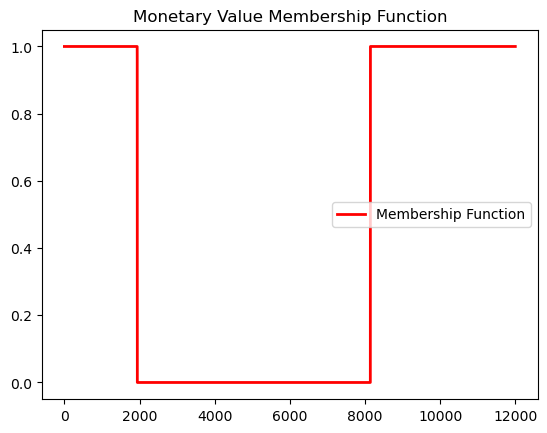

In [61]:
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mean = (b+c)/2
    width = (c-b)/2
    mfx = fuzz.gbellmf(x, width, mean, a)
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

x = np.arange(0, 12000, 1)
mfx = membership_monetary_value(x)

fig, ax = plt.subplots()
ax.plot(x, mfx, 'r', linewidth=2, label='Membership Function')
ax.set_title('Monetary Value Membership Function')
ax.legend()
plt.show()
#This bell-shaped membership function is useful for cases where we don't want to recommend products to 
#customers who have been purchasing a good average spend. However, in case the customer is purchasing low 
#monetary value we would like to recommend products to these customers. Also, in cases where customers have a 
#very high average spend, we would like to recommend premium products to these customers. This tactic could 
#be used when companies are trying to save on emails and are trying to send promotions to only customers who 
#are not purchasing, or those who are spending very high amounts. Again, seasonality can be used to see which 
#membership is best useful. When sales are going well recommendations can be sent to only customers who are not 
#purchasing. Therefore, fuzzy logic allows for a lot of flexibility and also seasonality can be taken into 
#consideration as to which membership has to be used.


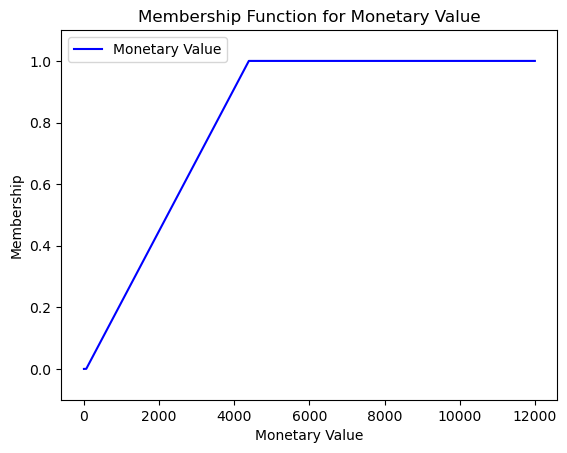

In [62]:
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 12000, 0.1)
mfx = membership_monetary_value(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



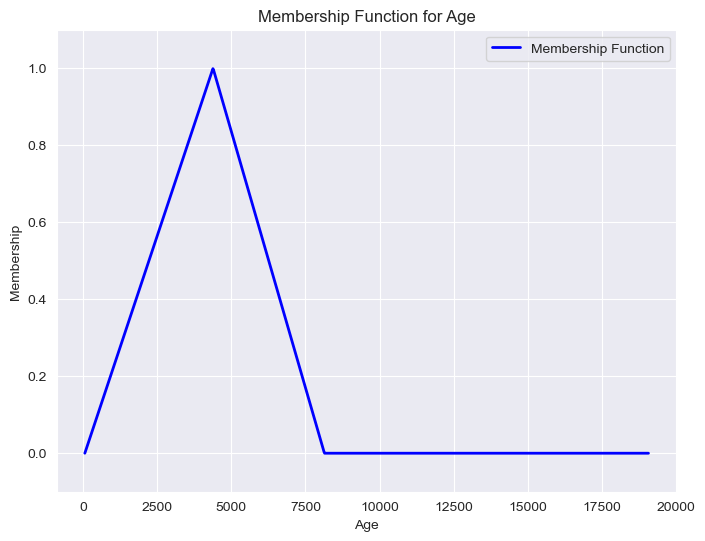

In [63]:
# So the below case can be used when we dont want to recommed to customers who have a very low monetary value spend or to customers who have a very high monetary value spend
# The reason could be that if we recommed to low purchasing customers then theu would not buy because they arent buying as frequently engh. Also busineess would decide not to recommend to customer who have a high monetary spend since they will anyway purcase.
#Business would like to recommd to customers who  have an avearge monetary spend since they would like to make these customers shift to the category who have a totalo moetary spend on the hoigher side.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the membership function
def monetary_traingular(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    return fuzz.trimf(x, [a, b, c])


# Generate x values for plotting
x = np.linspace(master_table_one_hot['total_monetary_value'].min(), master_table_one_hot['total_monetary_value'].max(), 1000)

# Calculate the membership function for x
mfx = monetary_traingular(x)

# Plot the membership function
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
plt.plot(x, mfx, 'b', linewidth=2, label='Membership Function')
plt.title('Membership Function for Age')
plt.xlabel('Age')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()
#between 25 and 40 the membership is considerably high. We would like to recommend these age groups fruits
#Above 40 people get health complications and have sugar. Youngsters dont usually consume fruits(external research)
#27 to about 40 is the sweet spot to recommend fruits 

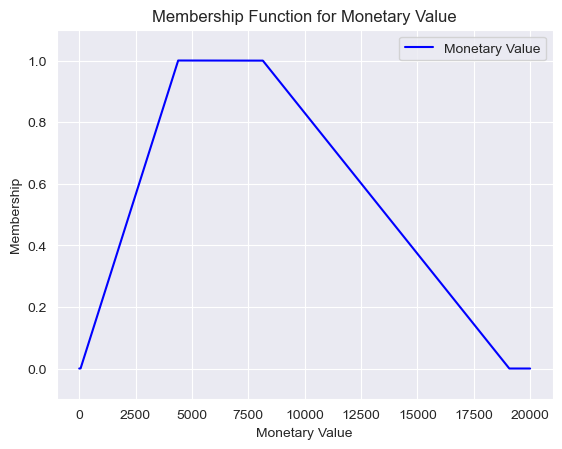

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    return fuzz.trapmf(x, [a, b, c, d]) 

x = np.arange(0, 20000, 0.1)
mfx = membership_monetary_value(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


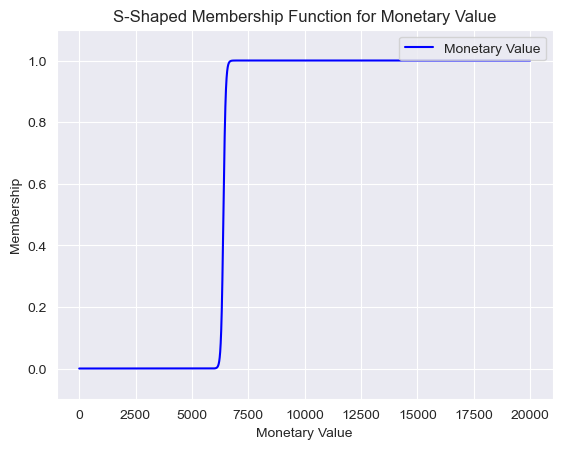

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def membership_s_shaped_monetary_value(x):
    a = 0.02  # Shape parameter
    b = master_table_one_hot['total_monetary_value'].mean()  # Midpoint

    mfx = 1 / (1 + np.exp(-a * (x - b)))
    return mfx

x = np.arange(0, 20000, 0.1)
mfx = membership_s_shaped_monetary_value(x)

# Plotting
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('S-Shaped Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


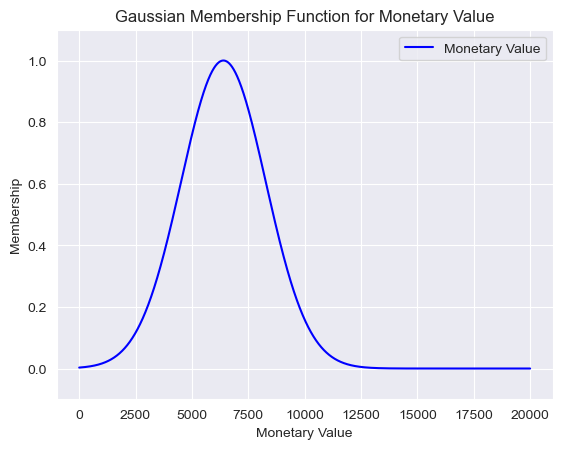

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def membership_gaussian_monetary_value(x):
    mean = master_table_one_hot['total_monetary_value'].mean()
    sigma = (master_table_one_hot['total_monetary_value'].quantile(0.75) - 
             master_table_one_hot['total_monetary_value'].quantile(0.25)) / 2

    mfx = np.exp(-0.5 * ((x - mean) / sigma) ** 2)
    return mfx

x = np.arange(0, 20000, 0.1)
mfx = membership_gaussian_monetary_value(x)

# Plotting
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Gaussian Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


### 4. Job Title

In [67]:
###  Next we were not able to find any specific trends in the below features. Therfore we created scores based on the average r=transaction counts. We will use these scores to create the memebrship functions. They are as belwo
### now memebrship functions can be used based on the business requirements. We shall play around with different membership functions

In [68]:
# 4. Job title
# So how we have planned to target our bikes is based on which job titles buy the most bycyles. So we are going to decide our fuzzy logic to recommend to those job titles who but the most cycles
# So this fuzzy logic along with the cluster logic will also recommend those cycles which similar user or job titles have bought while also giving a higher score to job titles which buy the most bycycles

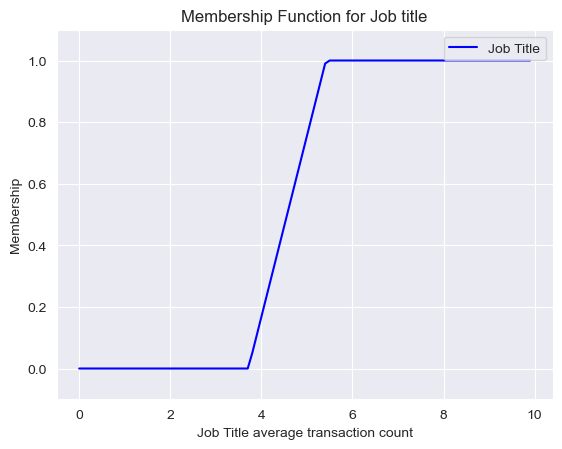

In [69]:
def membership_job_title(x):
    a = master_table_one_hot['job_title_transaction_count'].min()
    b = master_table_one_hot['job_title_transaction_count'].quantile(0.25)
    c = master_table_one_hot['job_title_transaction_count'].quantile(0.75)
    d = master_table_one_hot['job_title_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_job_title(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Job Title')
plt.title('Membership Function for Job title')
plt.xlabel('Job Title average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 5. Post Code

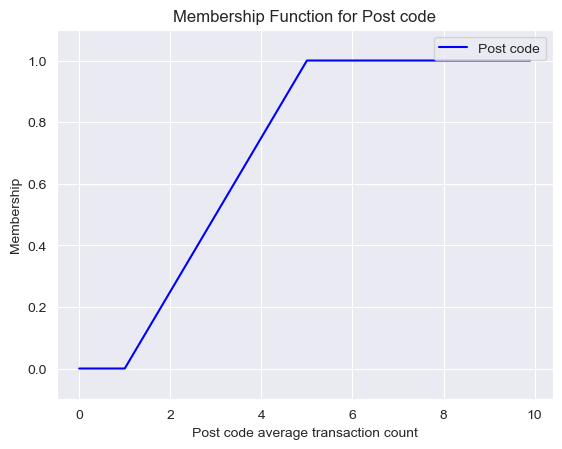

In [70]:
def membership_post_code(x):
    a = master_table_one_hot['postcode_transaction_count'].min()
    b = master_table_one_hot['postcode_transaction_count'].quantile(0.25)
    c = master_table_one_hot['postcode_transaction_count'].quantile(0.75)
    d = master_table_one_hot['postcode_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_post_code(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Post code')
plt.title('Membership Function for Post code')
plt.xlabel('Post code average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 6. Age

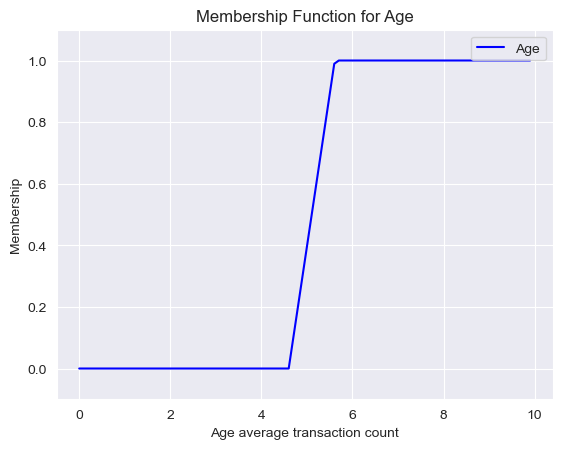

In [71]:
def membership_age(x):
    a = master_table_one_hot['age_transaction_count'].min()
    b = master_table_one_hot['age_transaction_count'].quantile(0.25)
    c = master_table_one_hot['age_transaction_count'].quantile(0.75)
    d = master_table_one_hot['age_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_age(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Age')
plt.title('Membership Function for Age')
plt.xlabel('Age average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 7. tenure_transaction_count

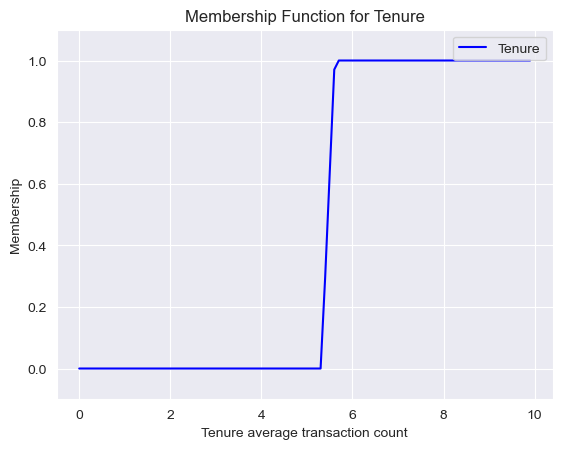

In [72]:
def membership_tenure(x):
    a = master_table_one_hot['tenure_transaction_count'].min()
    b = master_table_one_hot['tenure_transaction_count'].quantile(0.25)
    c = master_table_one_hot['tenure_transaction_count'].quantile(0.75)
    d = master_table_one_hot['tenure_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_tenure(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Tenure')
plt.title('Membership Function for Tenure')
plt.xlabel('Tenure average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### All the necessary memebership functions finally defined below:

In [73]:
def membership_brand(x):
    brands = master_table_one_hot.filter(regex='^brand_').columns.tolist()
    memberships = []
    for brand in brands:
        if brand in x:
            memberships.append(1)
        else:
            memberships.append(0)
    return np.array(memberships)

def membership_recency(x):
    mean = master_table_one_hot['recency'].mean()
    std = master_table_one_hot['recency'].std()
    mfx = fuzz.gaussmf(x, mean, std)
    return mfx

def membership_frequency_of_visits(x):
    a = master_table_one_hot['frequency'].min()
    b = master_table_one_hot['frequency'].quantile(0.25)
    c = master_table_one_hot['frequency'].quantile(0.75)
    d = master_table_one_hot['frequency'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_job_title(x):
    a = master_table_one_hot['job_title_transaction_count'].min()
    b = master_table_one_hot['job_title_transaction_count'].quantile(0.25)
    c = master_table_one_hot['job_title_transaction_count'].quantile(0.75)
    d = master_table_one_hot['job_title_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_post_code(x):
    a = master_table_one_hot['postcode_transaction_count'].min()
    b = master_table_one_hot['postcode_transaction_count'].quantile(0.25)
    c = master_table_one_hot['postcode_transaction_count'].quantile(0.75)
    d = master_table_one_hot['postcode_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_age(x):
    a = master_table_one_hot['age_transaction_count'].min()
    b = master_table_one_hot['age_transaction_count'].quantile(0.25)
    c = master_table_one_hot['age_transaction_count'].quantile(0.75)
    d = master_table_one_hot['age_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_tenure(x):
    a = master_table_one_hot['tenure_transaction_count'].min()
    b = master_table_one_hot['tenure_transaction_count'].quantile(0.25)
    c = master_table_one_hot['tenure_transaction_count'].quantile(0.75)
    d = master_table_one_hot['tenure_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx





In [74]:
#Price
#owns car
#walth segmant
#

In [75]:
master_table_one_hot.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
2,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,4
5,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,7
8,7,22,1542,2017-04-21,1,60.34,0,1,12.0,39.0,...,0,0,0,0,0,0,0,0,1,3
9,8,15,2459,2017-07-15,0,1292.84,0,0,18.0,31.0,...,0,0,0,0,0,0,0,1,0,2
13,10,12,3262,2017-08-30,1,1231.15,0,0,12.0,0.0,...,0,0,0,0,0,0,0,0,1,2


In [76]:
brands = ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles','Giant Bicycles', 'WeareA2B']

### Building the collaboartive logic

In [79]:
def fuzzy_recommendation(customer_id):
    # Get purchase history for the customer
    customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == customer_id]

    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
    membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
    membership_recency_val = membership_recency(customer_data['recency'].values)
    membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
    membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
    membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
    membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
    membership_age_val = membership_age(customer_data['age_transaction_count'].values)
    membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
    
    print("Length of membership_job_title_val:", len(membership_job_title_val))
    print("Length of membership_post_code_val:", len(membership_post_code_val))
    print("Length of membership_age_val:", len(membership_age_val))
    print("Length of membership_tenure_val:", len(membership_tenure_val))
    print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))
      
      

    # Calculate degree of membership for each cluster
    memberships = []
    for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
#     for i in range(len(kmeans.cluster_centers_)):
        membership = min(membership_job_title_val[i],membership_post_code_val[i],membership_age_val[i],membership_tenure_val[i],membership_frequency_of_visits_val[i],membership_recency_val[i],membership_monetary_value_val[i],np.max(membership_brand_val))
        memberships.append(membership)

    # Generate recommendations for products and brands
    #recommendations_product = {}
    recommendations_brand = {}
    for i, membership in enumerate(memberships):
#         for j in range(len(product_names)):
#             rule = f"product_{product_names[j]}"
#             support = kmeans.cluster_centers_[i][j + 10]
#             if rule not in recommendations_product:
#                 recommendations_product[rule] = 0
#             recommendations_product[rule] += support * membership

        for j in range(len(brands)):
            rule = f"brand_{brands[j]}"
#             support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
            support = kmeans.cluster_centers_[i][j + 18]
            if rule not in recommendations_brand:
                recommendations_brand[rule] = 0
            recommendations_brand[rule] += support * membership

#     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}

    # Get top 5 recommended products and brands
#     top_5_recommendations_product = []
    top_5_recommendations_brand = []
#     for rule in recommendations_product:
#         if len(top_5_recommendations_product) >= 5:
#             break
#         if rule.split('_')[0] == 'product':
#             top_5_recommendations_product.append(rule.split('_')[1])
    for rule in recommendations_brand:
        if len(top_5_recommendations_brand) >= 5:
            break
        if rule.split('_')[0] == 'brand':
            top_5_recommendations_brand.append(rule.split('_')[1])

    return top_5_recommendations_brand


In [84]:
# Loop through each customer and generate recommendations
for customer_id in master_table_one_hot['customer_id'].unique():
    recommendations_product_brand  = fuzzy_recommendation(customer_id)
#     print(f"Top 5 recommendations for customer {customer_id}: {recommendations_product}")
    print(f"Top 5 recommendations for customer {customer_id}: {recommendations_brand}")
    


NameError: name 'recommendations_brand' is not defined

In [83]:
def fuzzy_recommendation(customer_id):
    # Get purchase history for the customer
    customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == customer_id]
    

    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
    membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
    membership_recency_val = membership_recency(customer_data['recency'].values)
    membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
    membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
    membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
    membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
    membership_age_val = membership_age(customer_data['age_transaction_count'].values)
    membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
    
#     print("Length of membership_job_title_val:", len(membership_job_title_val))
#     print("Length of membership_post_code_val:", len(membership_post_code_val))
#     print("Length of membership_age_val:", len(membership_age_val))
#     print("Length of membership_tenure_val:", len(membership_tenure_val))
#     print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))
      
      

    # Calculate degree of membership for each cluster
    memberships = []
    for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
    #     for i in range(len(kmeans.cluster_centers_)):
            membership = membership_job_title_val[i]+membership_post_code_val[i]+membership_age_val[i]+membership_tenure_val[i]+membership_frequency_of_visits_val[i]+membership_recency_val[i]+membership_monetary_value_val[i]+np.max(membership_brand_val)
            memberships.append(membership)
  
    
    
        
#     customer_data = customer_data.reset_index()
    
    recommendations_brand = {}
    for i, membership in enumerate(memberships):
    #         for j in range(len(product_names)):
    #             rule = f"product_{product_names[j]}"
    #             support = kmeans.cluster_centers_[i][j + 10]
    #             if rule not in recommendations_product:
    #                 recommendations_product[rule] = 0
    #             recommendations_product[rule] += support * membership
        
        cluster_number  = customer_data['cluster'].iloc[i]

        for j in range(len(brands)):
            rule = f"brand_{brands[j]}"
    #         support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
            support = kmeans.cluster_centers_[cluster_number][j + 19]
            if rule not in recommendations_brand:
                recommendations_brand[rule] = 0
            recommendations_brand[rule] += support + membership

    #     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}


    

    # Get top 5 recommended products and brands
#     top_5_recommendations_product = []
    top_5_recommendations_brand = []
#     for rule in recommendations_product:
#         if len(top_5_recommendations_product) >= 5:
#             break
#         if rule.split('_')[0] == 'product':
#             top_5_recommendations_product.append(rule.split('_')[1])
    for rule in recommendations_brand:
        if len(top_5_recommendations_brand) >= 5:
            break
        if rule.split('_')[0] == 'brand':
            top_5_recommendations_brand.append(rule.split('_')[1])

    return top_5_recommendations_brand


In [ ]:
column_name = 'brand_Giant Bicycles'
column_index = master_table_one_hot.columns.get_loc(column_name)

In [ ]:
column_index 
#finiding the column index to start from that is the brands column


In [ ]:
customer_data

In [ ]:
customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == 15]
customer_data = customer_data.reset_index()


    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
membership_recency_val = membership_recency(customer_data['recency'].values)
membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
membership_age_val = membership_age(customer_data['age_transaction_count'].values)
membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
    
print("Length of membership_job_title_val:", len(membership_job_title_val))
print("Length of membership_post_code_val:", len(membership_post_code_val))
print("Length of membership_age_val:", len(membership_age_val))
print("Length of membership_tenure_val:", len(membership_tenure_val))
print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))


membership_brand_val 




In [ ]:
customer_data

In [ ]:
customer_data = customer_data.reset_index()

In [ ]:
cluster_number  = customer_data['cluster'][1]


In [ ]:
cluster_number

In [ ]:
membership_job_title_val

In [ ]:
#memebership or total brands should be less than the numebr of clusters.so quantity needs to be aggregared

In [ ]:
membership_post_code_val

In [ ]:
membership_age_val

In [ ]:
membership_tenure_val

In [ ]:
membership_recency_val

In [ ]:
memberships = []
for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
    membership = min(membership_job_title_val[i], membership_post_code_val[i], membership_age_val[i], membership_tenure_val[i], membership_frequency_of_visits_val[i], membership_recency_val[i], membership_monetary_value_val[i], np.max(membership_brand_val))
    memberships.append(membership)

In [ ]:
memberships

In [ ]:
len(membership_job_title_val)

In [ ]:
len(membership_post_code_val)

In [ ]:
len(membership_age_val)

In [ ]:
len(membership_tenure_val)

In [ ]:
recommendations_brand = {}
for i, membership in enumerate(memberships):
#         for j in range(len(product_names)):
#             rule = f"product_{product_names[j]}"
#             support = kmeans.cluster_centers_[i][j + 10]
#             if rule not in recommendations_product:
#                 recommendations_product[rule] = 0
#             recommendations_product[rule] += support * membership
cluster_number  = customer_data['cluster']['i']

    for j in range(len(brands)):
        rule = f"brand_{brands[j]}"
#         support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
        support = kmeans.cluster_centers_[cluster_number][j + 18]
        if rule not in recommendations_brand:
            recommendations_brand[rule] = 0
        recommendations_brand[rule] += support * membership

#     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}


In [ ]:
kmeans.cluster_centers_

In [ ]:
len(brands)

In [ ]:
customer_data

In [ ]:
rows_to_display = slice(0, 8)  # Rows 0 to 7
columns_to_display = slice(19, 25)  # Columns 19 to 24 (exclusive)

# Select the relevant rows and columns from cluster_centers_
selected_cluster_centers = kmeans.cluster_centers_[rows_to_display, columns_to_display]

# Print the selected cluster centers
print("Selected Cluster Centers (Rows 0 to 7, Columns 19 to 24):")
print(selected_cluster_centers)

In [ ]:
selected_columns = customer_data.iloc[:, [ 18,19, 20, 21, 22,23,24, -1]]
selected_columns

In [ ]:
kmeans.cluster_centers_[2][20]

In [ ]:
kmeans.cluster_centers_[1][19]

In [ ]:
kmeans.cluster_centers_[3][19]

In [ ]:
kmeans.cluster_centers_[4][19]

In [ ]:
kmeans.cluster_centers_[5][19]

In [ ]:
kmeans.cluster_centers_[6][19]

In [ ]:
kmeans.cluster_centers_[7][19]

In [ ]:
kmeans.cluster_centers_[1][20]

In [ ]:
kmeans.cluster_centers_[2][20]

In [ ]:
kmeans.cluster_centers_[3][20]

In [ ]:
kmeans.cluster_centers_[4][20]

In [ ]:
kmeans.cluster_centers_[5][20]

In [ ]:
kmeans.cluster_centers_[5][20]

In [ ]:
kmeans.cluster_centers_[7][20]

In [ ]:
kmeans.cluster_centers_[2][21]

In [ ]:
kmeans.cluster_centers_[2][22]

In [ ]:
kmeans.cluster_centers_[2][23]

In [ ]:
kmeans.cluster_centers_[2][24]

In [ ]:
kmeans.cluster_centers_[4][19]

In [ ]:
kmeans.cluster_centers_[4][20]

In [ ]:
kmeans.cluster_centers_[4][21]

In [ ]:
kmeans.cluster_centers_[4][22]

In [ ]:
kmeans.cluster_centers_[4][23]

In [ ]:
kmeans.cluster_centers_[4][24]

In [ ]:
kmeans.cluster_centers_[7][19]

In [ ]:
kmeans.cluster_centers_[3][19]

In [ ]:
max_valid_index = len(kmeans.cluster_centers_) - 1

In [ ]:
max_valid_j = len(kmeans.cluster_centers_[0]) - 1

In [ ]:
max_valid_index

In [ ]:
max_valid_j

In [ ]:
support

In [ ]:
i

In [ ]:
j

In [ ]:
recommendations_brand

In [ ]:
range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val)))     
 

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Create a DataFrame with 10 rows and 3 columns
data = {
    'Feature1': [1, 2, 5, 6, 9, 12, 15, 18, 20, 22],
    'Feature2': [3, 4, 7, 8, 10, 13, 16, 19, 21, 23],
    'Feature3': [0, 1, 4, 7, 9, 11, 14, 17, 20, 24]
}
df = pd.DataFrame(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)


In [ ]:
# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


In [ ]:
kmeans.cluster_centers_[0][0]

In [ ]:
kmeans.cluster_centers_[0][1]

In [ ]:
kmeans.cluster_centers_[8][2]